<a href="https://colab.research.google.com/github/Gcango/Analise_da_BD_Imoveis_SOIMOVE/blob/main/Analise_daBD_Imoveis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercicio no ambito do curso da Comunidade de DS.
A SOIMOVEL, é uma empresa imobiliaria tendo em sua base de dados mais 48895 imoveis. Com objectivo de auxiliar os gerentes para uma tomada de decisão, depois de expolorar a Base de Dados, devem ser respondidas algumas questões que encaminhadas:
a) - Quais são as categorias de immoveis que estao na BD
b) - Quantos Hosts unicos existem cadastrados
c) - Calcular o desvio Padrão em torno da media dos preços dos imoveis
d) - Quais apartamentos estão dentro da faixa de de preço de < 1100 USD
e) - Qual é a Distribuição do numeros de REViwes
f) - Qual é o intervalo de variação do preço dos alugueis dos imóveis?
g) - Qual a distribuição dos imóveis de acordo com o número mínimo de pernoites que podem ser agendado?
h) - Qual a média e a mediana de imóveis cadastrado por host (dono do imóvel)?
i) - Qual a data mais recente da última avaliação
j) - Qual o valor máximo de pernoites agendadas?
k) - Quantos nomes de donos de imóveis são únicos?
l) - Quantos identificadores únicos existem na base de dados?
m) - Quantidade de proprietários por região.
n) - Qual é Preço médio do aluguel por região
o) - Qual é o Número de avaliações média por tipo de quarto
p) - Qual é Desvio Padrão do preço do aluguel por região e tipo de quarto
q) - Qual é o valor do aluguel (diária) mais caro de cada região da base de dados da cidade de Nova York?
r) - Conseguimos saber onde estão localizados os imóveis com o valor do aluguel mais caro, na cidade de Nova York?
s) - Conseguimos saber onde estão localizados os imóveis pelo seu tipo?
t) - Qual a média de preço por região?
u) - Qual o maior valor do aluguel por bairro e por tipo de quarto?
v) - Qual o menor valor de latitude região?
x) - Faça um histograma somente com os proprietários que possuem mais de um imóvel listado na base de dados de NY
w) - Desenhe um mapa com os imóveis mais baratos por região
y) - Desenhe um mapa com os imóveis que possuem o maior número de avaliações por região
z) - Desenhe um mapa somente com 100 imóveis do tipo “private room”
escolhidos aleatoriamente
a.1) - #Desenhe um mapa somente com 100 imóveis do tipo “shared room” escolhidos aleatoriamente


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.express as px
import folium

In [3]:
dados = pd.read_csv("/content/AB_NYC_2019.csv")
dados.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [ ]:
#Exploração da Base de Dados

In [4]:
dados.shape

(48895, 16)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
dados.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [7]:
dados.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
#Respondendo questões dos gerentes

In [8]:
# a) - Quais são as categorias de imoveis que estao na BD
dados.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [13]:
categ_imoveis = dados['room_type'].unique()
print("As Categorias Existente na Base de Dados são: ", categ_imoveis)

As Categorias Existente na Base de Dados são:  ['Private room' 'Entire home/apt' 'Shared room']


In [16]:
#b) - Quantos Hosts unicos existem cadastrados
host_unicos = len(dados['host_id'].unique())
print("O numero dos Hosts Únicos Cadastrados na Base de Dados é de: ", host_unicos)

O numero dos Hosts Únicos Cadastrados na Base de Dados é de:  37457


In [25]:
#c) - Calcular o desvio PAdrão em torno da media dos preços dos imoveis
preco = dados['price']
desv_padrao = preco.std()
media_preco = preco.mean()
print("O desvio padrão do preso dos imóveis é USD = ", round(desv_padrao, 3))
print(" A média dos presos dos imóveis é USD = ", round(media_preco, 3))

O desvio padrão do preso dos imóveis é USD =  240.154
 A média dos presos dos imóveis é USD =  152.721


In [41]:
#d) - Quais apartamentos estão dentro da faixa de de preço de < 110 USD
linhas = dados.loc[:,'price'] < 1100
faixa_1100 = dados.loc[linhas, 'price']
print(" O Maior preço desta seleção é de USD = ", round(faixa_1100.max(), 3))

 O Maior preço desta seleção é de USD =  1099


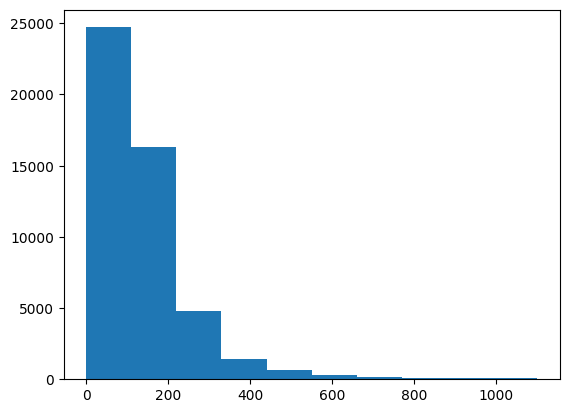

In [38]:
plt.hist(faixa_1100, bins=10);

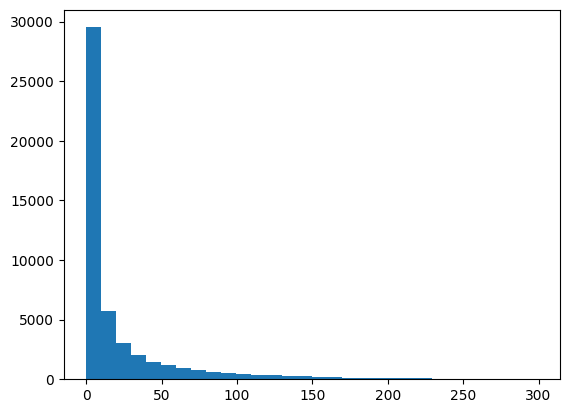

In [44]:
#e) - Qual é a Distribuição do numeros de Reviwes
reviwes_a = dados.loc[:,'number_of_reviews'] < 300
distr_reviwes = dados.loc[reviwes_a, 'number_of_reviews']

plt.hist(distr_reviwes, bins=30);

In [45]:
#f) - Qual é o intervalo de variação do preço dos alugueis dos imóveis?

dados.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')